### Bird Classifier - Testing the trained model
#### Notebook Author: Nirupam Purushothama

Refer to the CNN_Bird_Classifier_Training notebook to train the model.

Sharing a test set of images (downloaded from google)

#### References: 
1. Machine Learning is Fun - Part 3 - [Medium Blog](https://medium.com/@ageitgey/machine-learning-is-fun-part-3-deep-learning-and-convolutional-neural-networks-f40359318721)
2. Datasets 
    * [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html), Contains 6,000 birds and 52,000 other objects
    * [Caltech-UCSD Birds-200-2011 dataset](http://www.vision.caltech.edu/visipedia/CUB-200-2011.html), Contains 12,000 birds
    * Full data is available [here](https://s3-us-west-2.amazonaws.com/ml-is-fun/data.zip)
3. Uses TFLearn (Framework on top of TensorFlow)
4. The testing code is taken from this [github-account](https://gist.github.com/ageitgey/a40dded08e82e59724c70da23786bbf0)

In [1]:
  # -*- coding: utf-8 -*-
from __future__ import division, print_function, absolute_import

import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation
import scipy
import numpy as np
import argparse
from IPython.display import Image

In [2]:
#parser = argparse.ArgumentParser(description='Decide if an image is a picture of a bird')
#parser.add_argument('image', type=str, help='The image image file to check')
#args = parser.parse_args()

# Recreate the network and load the trained network.

# Same network definition as before
img_prep = ImagePreprocessing()
img_prep.add_featurewise_zero_center()
img_prep.add_featurewise_stdnorm()
img_aug = ImageAugmentation()
img_aug.add_random_flip_leftright()
img_aug.add_random_rotation(max_angle=25.)
img_aug.add_random_blur(sigma_max=3.)

network = input_data(shape=[None, 32, 32, 3],
                     data_preprocessing=img_prep,
                     data_augmentation=img_aug)
network = conv_2d(network, 32, 3, activation='relu')
network = max_pool_2d(network, 2)
network = conv_2d(network, 64, 3, activation='relu')
network = conv_2d(network, 64, 3, activation='relu')
network = max_pool_2d(network, 2)
network = fully_connected(network, 512, activation='relu')
network = dropout(network, 0.5)
network = fully_connected(network, 2, activation='softmax')
network = regression(network, optimizer='adam',
                     loss='categorical_crossentropy',
                     learning_rate=0.001)

model = tflearn.DNN(network, tensorboard_verbose=0, checkpoint_path='bird-classifier.tfl.ckpt')
#model.load("bird-classifier.tfl.ckpt-50912")
model.load("bird-classifier.tfl")

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
INFO:tensorflow:Restoring parameters from /home/nirupam/learning/CNN_ImageAnalysis/BirdClassifier/bird-classifier.tfl


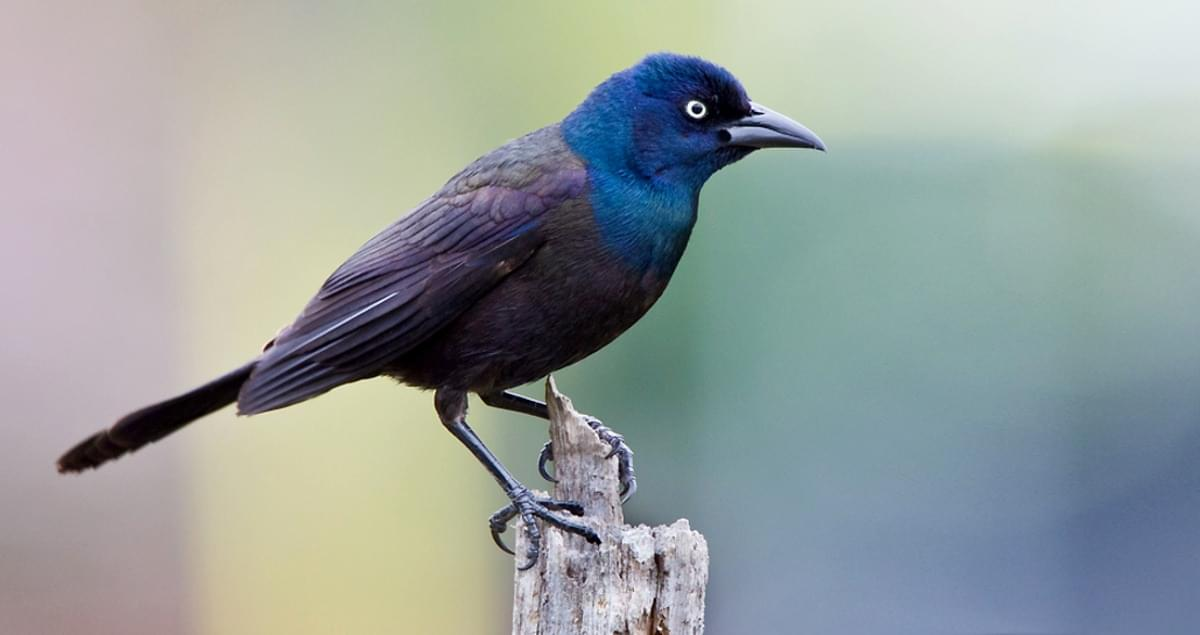

In [3]:
fileDir = "../../data/test_images/"
filename = "bird6.jpg"
filepath = fileDir + filename
Image(filename=filepath) 

In [4]:
# Load the image file
img = scipy.ndimage.imread(filepath, mode="RGB")

# Scale it to 32x32
img = scipy.misc.imresize(img, (32, 32), interp="bicubic").astype(np.float32, casting='unsafe')

# Predict
prediction = model.predict([img])

# Check the result.
is_bird = np.argmax(prediction[0]) == 1

if is_bird:
    print("That's a bird!")
else:
    print("That's not a bird!")

That's a bird!


/home/nirupam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
/home/nirupam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """
